<a href="https://colab.research.google.com/github/rrohanj/MLREPO/blob/main/week4(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("="*60)
print("PART A: LINEAR REGRESSION")
print("="*60)
print("STEP 1: CREATING SYNTHETIC REGRESSION DATASET")
X,y=make_regression(n_samples=300,n_features=1,noise=15,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

PART A: LINEAR REGRESSION
STEP 1: CREATING SYNTHETIC REGRESSION DATASET
Training set size: 240 samples
Testing set size: 60 samples


In [34]:
print("STEP 2: TRAINING THE REGRESSION MODEL")
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_train_pred=linear_model.predict(X_train)
y_test_pred=linear_model.predict(X_test)
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
mae_train=mean_absolute_error(y_train,y_train_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
print("MODEL PERFORMANCE METRICS:")
print("="*40)
print(f"Training MSE:{mse_train:.4f}")
print(f"Testing MSE :{mse_test:.4f}")
print(f"Training MAE:{mae_train:.4f}")
print(f"Testing MAE:{mae_test:.4f}")
print(f"Training R2 Score:{r2_train:.4f}")
print(f"Testing R2 Score:{r2_test:.4f}")

STEP 2: TRAINING THE REGRESSION MODEL
MODEL PERFORMANCE METRICS:
Training MSE:228.8446
Testing MSE :240.0475
Training MAE:12.1294
Testing MAE:12.0117
Training R2 Score:0.7564
Testing R2 Score:0.7986


In [35]:
print("MODEL COEFFICIENTS:")
print("="*40)
print(f"Intercept (B0):{linear_model.intercept_:.4f}")
print(f"Coefficient (B1):{linear_model.coef_[0]:.4f}")
print("\n Interpretation")
print("="*40)
print("Intercept (B0) Expected value of y when  all features are 0")
print(f"Coefficient (B1): For each unit increase in X,y increases by {linear_model.coef_[0]:.4f}")

MODEL COEFFICIENTS:
Intercept (B0):0.3065
Coefficient (B1):27.6115

 Interpretation
Intercept (B0) Expected value of y when  all features are 0
Coefficient (B1): For each unit increase in X,y increases by 27.6115


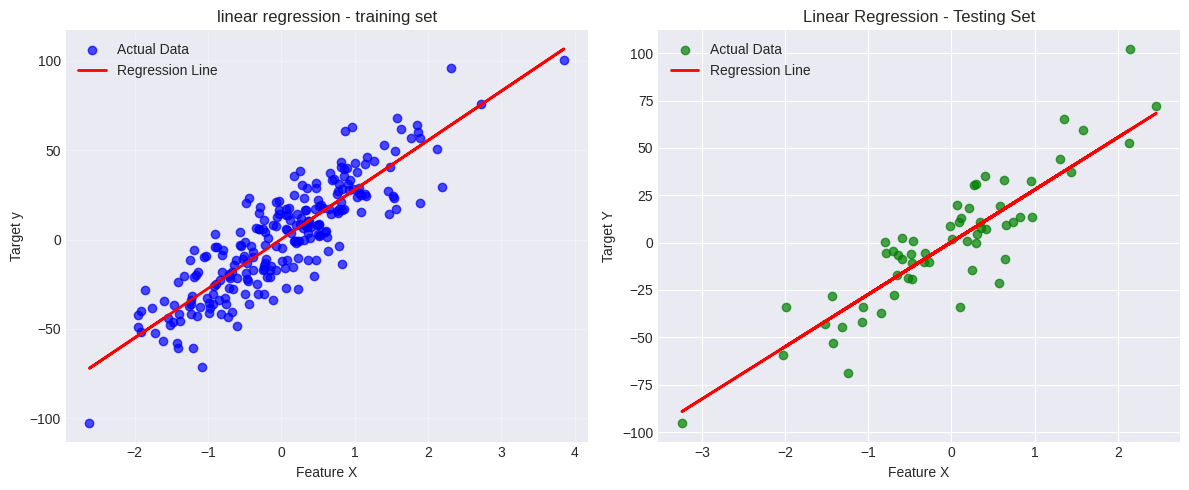

In [36]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(X_train,y_train,alpha=0.7,label="Actual Data",color="blue")
axes[0].plot(X_train,y_train_pred,color="red",linewidth=2,label="Regression Line")
axes[0].set_xlabel("Feature X")
axes[0].set_ylabel("Target y")
axes[0].set_title("linear regression - training set")
axes[0].legend()
axes[0].grid(True,alpha=0.3)

axes[1].scatter(X_test,y_test,alpha=0.7,label="Actual Data",color="green")
axes[1].plot(X_test,y_test_pred,color="red",linewidth=2,label="Regression Line")
axes[1].set_xlabel("Feature X")
axes[1].set_ylabel("Target Y")
axes[1].set_title("Linear Regression - Testing Set")
axes[1].legend()
plt.tight_layout()
plt.show()

In [37]:
print("="*60)
print("PART B: LOGISTIC REGRESSION")
print("="*60)
print("Loading Cancer Dataset")
data=load_breast_cancer()
X,y=data.data,data.target
print(f"Dataset Shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Classes: {data.target_names}")
print(f"Features: {data.feature_names[:5]}")

PART B: LOGISTIC REGRESSION
Loading Cancer Dataset
Dataset Shape: (569, 30)
Number of features: 30
Classes: ['malignant' 'benign']
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"\nTesting set size: {X_test.shape[0]} samples")
print(f'Class distribtuin in training set: {np.bincount(y_train)}')
print(f"Class distribution in testing set: {np.bincount(y_test)}")
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

print("\nTraining Logistic Regression Model")
logistic_model=LogisticRegression(max_iter=1000,random_state=42)
logistic_model.fit(X_train_scaled,y_train)

y_train_pred=logistic_model.predict(X_train_scaled)
y_test_pred=logistic_model.predict(X_test_scaled)
y_test_prob=logistic_model.predict_proba(X_test_scaled)[:,1]

accuracy_train=accuracy_score(y_train,y_train_pred)
accuracy_test=accuracy_score(y_test,y_test_pred)
precision=precision_score(y_test,y_test_pred)
recall=recall_score(y_test,y_test_pred)
f1=f1_score(y_test,y_test_pred)

print("\nModel Performance Metrics:")
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuraqcy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1_Score: {f1:.4f}")


Training set size: 398 samples

Testing set size: 171 samples
Class distribtuin in training set: [148 250]
Class distribution in testing set: [ 64 107]

Training Logistic Regression Model

Model Performance Metrics:
Training Accuracy: 0.9874
Testing Accuraqcy: 0.9649
Precision: 0.9810
Recall: 0.9626
F1_Score: 0.9717


Confusion Matrix:


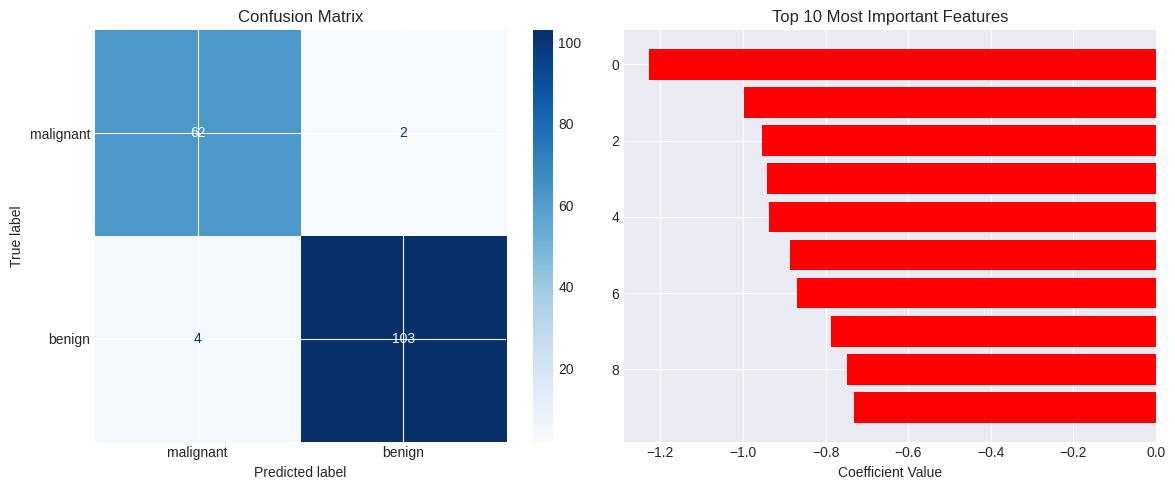

In [39]:
print("Confusion Matrix:")
fig,axes=plt.subplots(1,2,figsize=(12,5))
cm=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=data.target_names)
disp.plot(ax=axes[0],cmap="Blues")
axes[0].set_title("Confusion Matrix")
feature_importance=pd.DataFrame({
    "Feature":data.feature_names,
    "Coefficient":logistic_model.coef_[0]
})
feature_importance["Abs_Coefficient"]=np.abs(feature_importance["Coefficient"])
feature_importance=feature_importance.sort_values("Abs_Coefficient",ascending=False)
top_features=feature_importance.head(10)
colors=["red" if x<0 else "green" for x in top_features["Coefficient"]]
axes[1].barh(range(len(top_features)),top_features["Coefficient"],color=colors)
axes[1].set_xlabel("Coefficient Value")
axes[1].set_title("Top 10 Most Important Features")
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()

In [40]:
print("Top 10 Model Coefficients (Feature Importance)")
print("="*40)
for idx,row in top_features.iterrows():
  direction="increases" if row["Coefficient"]>0 else 'decreases'
  print(f"{row["Feature"]:25}Coefficient: {row['Coefficient']:8.4f} {direction} probability of malignant")

print("\nInterpretation:")
print("="*40)
print("Positive coefficients increase probability of malignant class")
print("Negative coefficients decrease probability of malignant class")
print("Larger absolute values indicate stronger feature influence")
print(f"\nModel Intercept: {logistic_model.intercept_[0]:.4f}")


Top 10 Model Coefficients (Feature Importance)
worst texture            Coefficient:  -1.2263 decreases probability of malignant
worst concave points     Coefficient:  -0.9968 decreases probability of malignant
worst area               Coefficient:  -0.9550 decreases probability of malignant
worst radius             Coefficient:  -0.9411 decreases probability of malignant
area error               Coefficient:  -0.9375 decreases probability of malignant
radius error             Coefficient:  -0.8864 decreases probability of malignant
worst symmetry           Coefficient:  -0.8694 decreases probability of malignant
worst concavity          Coefficient:  -0.7860 decreases probability of malignant
worst smoothness         Coefficient:  -0.7490 decreases probability of malignant
worst perimeter          Coefficient:  -0.7310 decreases probability of malignant

Interpretation:
Positive coefficients increase probability of malignant class
Negative coefficients decrease probability of malignan


Decision Boundary Visualization (using 2 most important features...)


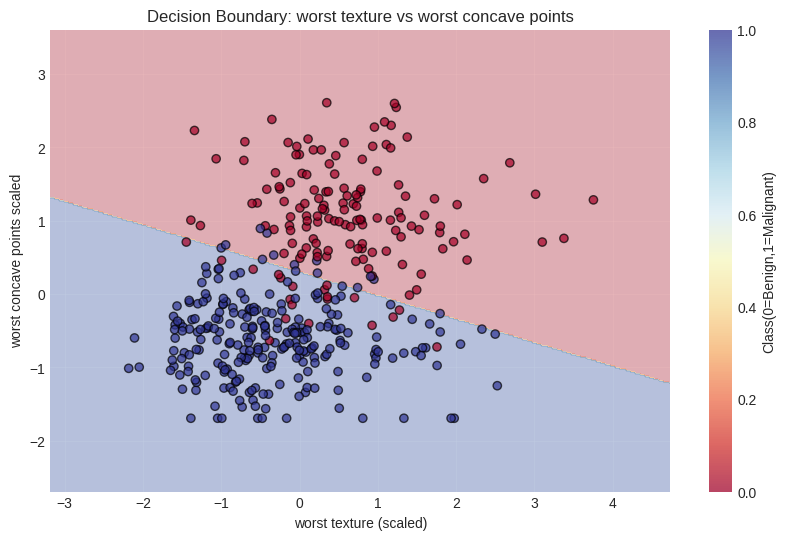

PROGRAM COMPLETED!!!!!


In [41]:
print("\nDecision Boundary Visualization (using 2 most important features...)")
top_two_features=feature_importance.head(2)["Feature"].values
idx1=np.where(data.feature_names==top_two_features[0])[0][0]
idx2=np.where(data.feature_names==top_two_features[1])[0][0]
X_two_features=X[:,[idx1,idx2]]
X_train_2d,X_test_2d,y_train_2d,y_test_2d=train_test_split(X_two_features,y,test_size=0.3,random_state=42,stratify=y)
scaler_2d=StandardScaler()
X_train_2d_scaled=scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled=scaler_2d.fit_transform(X_test_2d)
model_2d=LogisticRegression(max_iter=1000,random_state=42)
model_2d.fit(X_train_2d_scaled,y_train_2d)
x_min,x_max=X_train_2d_scaled[:,0].min()-1,X_train_2d_scaled[:,0].max()+1
y_min,y_max=X_train_2d_scaled[:,1].min()-1,X_train_2d_scaled[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z=model_2d.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="RdYlBu")
scatter=plt.scatter(X_train_2d_scaled[:,0],X_train_2d_scaled[:,1],c=y_train_2d,cmap="RdYlBu",edgecolors="k",alpha=0.7)
plt.xlabel(f"{top_two_features[0]} (scaled)")
plt.ylabel(f"{top_two_features[1]} scaled")
plt.title(f"Decision Boundary: {top_two_features[0]} vs {top_two_features[1]}")
plt.colorbar(scatter,label="Class(0=Benign,1=Malignant)")
plt.grid(True,alpha=0.3)
plt.show()
print("PROGRAM COMPLETED!!!!!")
print("="*60)